In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
arma_file="./data/arma.jpg"
kit1_file="./data/kit1.jpg"

img1 = cv.imread(arma_file,cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread(kit1_file,cv.IMREAD_GRAYSCALE) # trainImage

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)

In [4]:
keypoints_sift_1, descriptors_sift_1 = sift.detectAndCompute(img1, None)
keypoints_surf_1, descriptors_surf_1 = surf.detectAndCompute(img1, None)
keypoints_orb_1, descriptors_orb_1 = orb.detectAndCompute(img1, None)

In [5]:
keypoints_sift_2, descriptors_sift_2 = sift.detectAndCompute(img2, None)
keypoints_surf_2, descriptors_surf_2 = surf.detectAndCompute(img2, None)
keypoints_orb_2, descriptors_orb_2 = orb.detectAndCompute(img2, None)

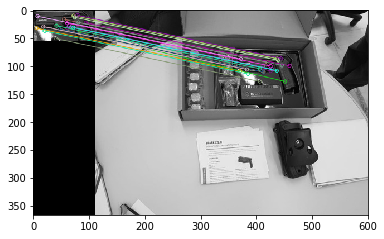

(<matplotlib.image.AxesImage at 0x1ddcba57d68>, None)

In [6]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_sift_1,descriptors_sift_2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,keypoints_sift_1,img2,keypoints_sift_2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

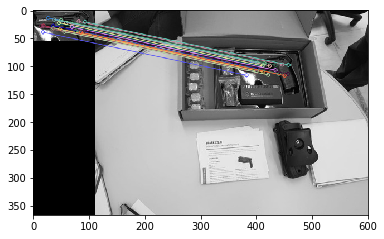

(<matplotlib.image.AxesImage at 0x1ddcbb171d0>, None)

In [7]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_surf_1,descriptors_surf_2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,keypoints_surf_1,img2,keypoints_surf_2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

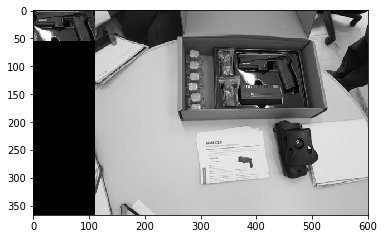

(<matplotlib.image.AxesImage at 0x1ddcbc48978>, None)

In [10]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(descriptors_orb_1,descriptors_orb_2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,keypoints_orb_1,img2,keypoints_orb_2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()